<a href="https://colab.research.google.com/github/giovanimachado/phd-puc/blob/main/computacao-evolucionaria/Aula07_DENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

     |████████████████████████████████| 163kB 5.1MB/s 


In [2]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
import math
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



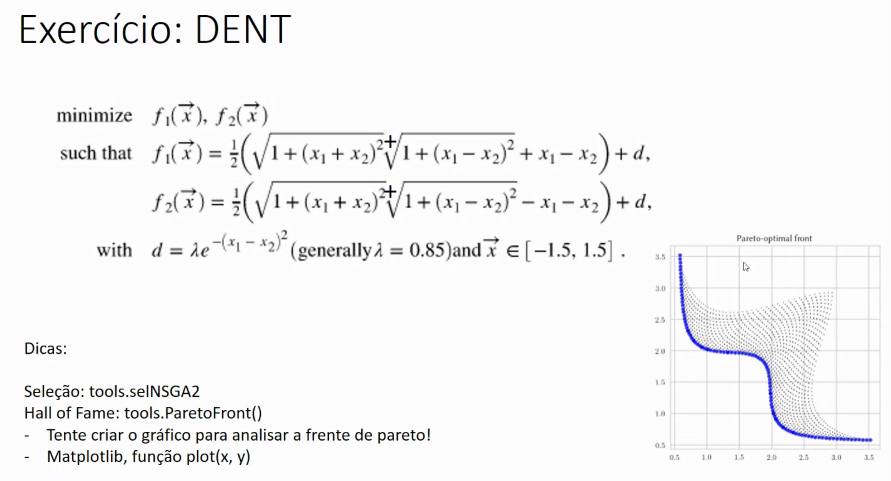

In [3]:
#Função Objetivo
def objective_function(individual):
  l = .85
  
  d = l * np.exp(-1*(individual[0]-individual[1])**2)

  f1 = (1/2 * (np.sqrt(1+(individual[0]+individual[1])**2) + 
                      np.sqrt(1+(individual[0]-individual[1])**2) + 
                      individual[0]-individual[1]) + d)
  
  f2 = (1/2 * (np.sqrt(1+(individual[0]+individual[1])**2) + 
                       np.sqrt(1+(individual[0]-individual[1])**2) - 
                       individual[0]+individual[1]) + d)
  
  return (f1, f2)

In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMin)        # indivíduo

In [5]:
lb = -1.5
ub = 1.5

In [6]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
#toolbox.register("attr_int", random.randint, 0, 30000) # variáveis inteiras
toolbox.register("attr_real", random.uniform, lb, ub) # variáveis reais

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 2)   # 2: número de variáveis de decisão - criar indivíduo
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos - criar população

In [7]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=0.5, low=lb, up=ub)
#toolbox.register("mutate", tools.mutUniformInt, low=lb, up=ub, indpb=0.05)
toolbox.register("mutate", tools.mutPolynomialBounded, low=lb, up=ub, indpb=0.5, eta=0.5)
#toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("select", tools.selNSGA2)


In [8]:
pop = toolbox.population(n=500)                            # inicialização da pop
hof = tools.ParetoFront()                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [9]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=100, stats=stats, halloffame=hof)

gen	nevals	avg    	std    	min     	max    
0  	500   	1.89039	0.70333	0.586172	3.44094
1  	242   	1.89695	0.700782	0.587577	3.41375
2  	274   	1.88877	0.704188	0.584522	3.46633
3  	280   	1.87414	0.707427	0.584646	3.46145
4  	292   	1.88606	0.696824	0.584034	3.499  
5  	267   	1.89181	0.695918	0.584034	3.499  
6  	288   	1.88918	0.701438	0.584034	3.499  
7  	255   	1.88119	0.708049	0.584034	3.499  
8  	300   	1.87325	0.684621	0.587827	3.44456
9  	283   	1.86523	0.684635	0.588013	3.44094
10 	280   	1.87113	0.690323	0.588013	3.43223
11 	260   	1.85852	0.66982 	0.586589	3.39841
12 	273   	1.86331	0.660648	0.586589	3.39841
13 	302   	1.87344	0.657304	0.584356	3.47385
14 	267   	1.87833	0.665868	0.584356	3.47385
15 	286   	1.84784	0.678339	0.586996	3.39539
16 	263   	1.84386	0.676985	0.586996	3.39539
17 	292   	1.86023	0.676568	0.586996	3.39539
18 	274   	1.87849	0.671606	0.586996	3.39539
19 	292   	1.88573	0.653536	0.585982	3.41742
20 	293   	1.88769	0.656368	0.589218	3.36735
21 	249   	1

## Resultados

In [10]:
len(pop)

500

In [11]:
# frente de pareto (soluções não dominadas)
pareto_front = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
print(pareto_front)
print(len(pareto_front))

[[-0.7878112028373108, 0.7970975521852124], [-0.6761870339139354, 0.5968700418932105], [0.8559545090854136, -0.7834206680287569], [0.7179712278779813, -0.7762824446755452], [0.11390885018272678, -0.20393048376166115], [0.14020877023923523, -0.16487570820432693], [-0.6175653879180854, 0.47807713797465734], [-0.46525992810693795, 0.555207202524127], [-1.4101024549980439, 1.470288109539625], [-1.3955113211026615, 1.3170769922374492], [0.5844288861555829, -0.46709525910233735], [0.9714695215471568, -1.0283011765096142], [0.9914683545828908, -1.0655206138039628], [0.41651431112371123, -0.3205975201696321], [0.7739287997523436, -1.0447486292385544], [-0.4350563112044597, 0.48828009319842614], [0.5933008659772399, -0.6642632299416076], [1.1801950530827159, -1.0708337616216959], [1.0826893626263616, -1.0337170030998768], [0.3677242556116908, -0.3230420952633919], [-1.210140462301132, 1.019743824615733], [0.12939808779222306, -0.09255570135728525], [1.0359550620335614, -0.9800924480607347], [-0

In [12]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[-1.4937701028849153, 1.499970513561079]
Melhor Resultado da Função Objetivo:


(0.5814182656248832, 3.5751588820708777)

Gráfico da Evolução

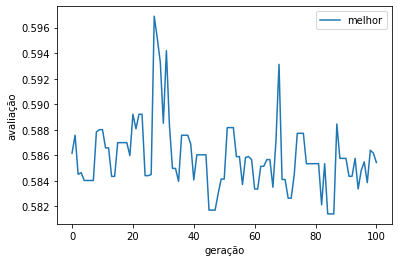

In [13]:
import matplotlib.pyplot as plt
gen, min, avg = log.select('gen', 'min', 'avg')
plt.plot(gen, min, label='melhor')
# plt.plot(gen, avg, label='média')
plt.ylabel('avaliação')
plt.xlabel('geração')
plt.legend();

In [14]:
objective_function([-1.3906921986890894, 1.4592145142099264])

(0.5866013161928029, 3.436508029091819)

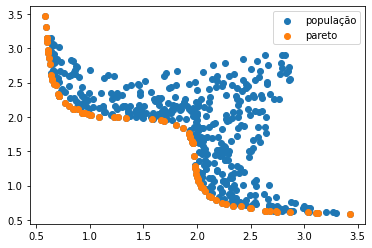

In [15]:
import matplotlib.pyplot as plt
f1s = []
f2s = []
for i in pop:
  f1s.append(i.fitness.values[0])
  f2s.append(i.fitness.values[1])

plt.scatter(f1s, f2s, label='população');

f1s = []
f2s = []
for i in pareto_front:
  f1s.append(i.fitness.values[0])
  f2s.append(i.fitness.values[1])

plt.scatter(f1s, f2s, label='pareto');
plt.legend();